# DS CA1
## Hypothesis Testing
written by Babak Hosseini Mohtasham 810101408

In [36]:
import random
import math
from scipy.stats import norm
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Unfair Coin

In [37]:
def get_sample(probability,sample_size):
    return np.array([1 if random.random()<probability else 0 for i in range(sample_size)])

def calculate_confidence_interval(confidence_level,sample):
    return sample.mean() - norm.ppf(1-(1-confidence_level)/2)*sample.std()/math.sqrt(sample.size), sample.mean() + norm.ppf(1-(1-confidence_level)/2)*sample.std()/math.sqrt(sample.size)

def calculate_p_value_two_sided_norm(sample):
    difference=abs(sample.mean()-0.5)
    return (norm.sf((difference)/(sample.std()/np.sqrt(len(sample)))))*2 if sample.std() else 1

def test(probability,sample_size,confidence_level):
    sample=get_sample(probability,sample_size)
    print(f"Confidence interval with confidence level of {confidence_level%100}%: {calculate_confidence_interval(confidence_level,sample)}")
    print(f"P_value: {calculate_p_value_two_sided_norm(sample)}")


def simulate(probability, sample_size, confidence_level,alpha,iterations):
    average_p_value=0
    ratio_of_p_value_rejected_samples=0
    # ratio_of_not_containing_p_confidence_interval=0
    average_min_interval=0
    average_max_interval=0
    for _ in range(iterations):
        sample = get_sample(probability, sample_size)
        p = calculate_p_value_two_sided_norm(sample)
        average_p_value+=p
        ratio_of_p_value_rejected_samples+= 1 if p<alpha else 0
        a,b=calculate_confidence_interval(confidence_level,sample)
        average_min_interval+=a
        average_max_interval+=b
        # ratio_of_not_containing_p_confidence_interval+= 1 if probability<a or probability>b else 0
    average_p_value/=iterations
    ratio_of_p_value_rejected_samples/=iterations
    # ratio_of_not_containing_p_confidence_interval /= iterations
    average_min_interval/=iterations
    average_max_interval/=iterations
    print(f"Average confidence interval with confidence level of {confidence_level%100}%: ({average_min_interval}, {average_max_interval})")
    # print(f"Percentage of intervals not containing {probability} confidence interval if confidence level = {confidence_level%100}%:
        #   {ratio_of_not_containing_p_confidence_interval*100}%") no need for this because the ratio is equalt o 1-confidence intreval as expected.
    print(f"Average P_value: {average_p_value}")
    print(f"Percentage of rejected samples with p_value if alpha = {alpha}: {ratio_of_p_value_rejected_samples*100}%")

test(0.6, 30, 0.95)
test(0.6, 100, 0.95)
test(0.6, 1000,0.95)
simulate(0.6, 30, 0.95, 0.05, 10000)
simulate(0.6, 100, 0.95, 0.05, 10000)
simulate(0.6, 1000, 0.95, 0.05, 10000)
# simulate(0.9, 30, 0.68, 0.05, 10000)
# simulate(0.9, 100, 0.68, 0.05, 10000)
# simulate(0.9, 1000, 0.68, 0.05, 10000)
# simulate(0.5, 30, 0.99, 0.05, 10000)
# simulate(0.5, 100, 0.99, 0.05, 10000)
# simulate(0.5, 1000, 0.99, 0.05, 10000)

Confidence interval with confidence level of 0.95%: (0.4246954918846837, 0.7753045081153163)
P_value: 0.2635524772829728
Confidence interval with confidence level of 0.95%: (0.5459217287420775, 0.7340782712579226)
P_value: 0.0035379364782220975
Confidence interval with confidence level of 0.95%: (0.5716619353352421, 0.6323380646647578)
P_value: 4.4095285357100424e-11
Average confidence interval with confidence level of 0.95%: (0.4273627793998363, 0.7718172206002291)
Average P_value: 0.33332881776151035
Percentage of rejected samples with p_value if alpha = 0.05: 17.560000000000002%
Average confidence interval with confidence level of 0.95%: (0.5052288164629459, 0.6962031835370338)
Average P_value: 0.13777342799006798
Percentage of rejected samples with p_value if alpha = 0.05: 55.279999999999994%
Average confidence interval with confidence level of 0.95%: (0.5696144212372275, 0.6303113787627611)
Average P_value: 4.713130877185432e-06
Percentage of rejected samples with p_value if alpha

## T-Test

In [38]:
df=pd.read_csv('job_placement.csv')
placed_df = df[df['placement_status'] == 'Placed']
not_placed_df = df[df['placement_status'] =='Not Placed']
pd.concat([placed_df, not_placed_df], keys=['Placed','Not Placed'],axis=1).describe()

Placed                                                            \
               id         age        salary         gpa years_of_experience   
count  570.000000  570.000000    570.000000  570.000000          569.000000   
mean   351.757895   24.424561  64442.105263    3.761404            2.298770   
std    201.313222    1.174761   2255.471564    0.113352            0.775061   
min      1.000000   23.000000  57000.000000    3.500000            1.000000   
25%    179.250000   23.000000  63000.000000    3.700000            2.000000   
50%    352.000000   24.000000  65000.000000    3.800000            2.000000   
75%    524.750000   26.000000  66000.000000    3.900000            3.000000   
max    699.000000   26.000000  68000.000000    3.900000            3.000000   

       Not Placed                                                     
               id         age salary         gpa years_of_experience  
count  130.000000  130.000000  130.0  130.000000          130.000000  
mean   344.984615   24.353846    0.0    3.702308            1.646154  
std    206.831916    1.119673    0.0    0.141676            0.540765  
min      4.000000   23.000000    0.0    3.400000            1.000000  
25%    162.250000   23.000000    0.0    3.600000            1.000000  
50%    344.000000   24.000000    0.0    3.700000            2.000000  
75%    523.500000   25.000000    0.0    3.900000            2.000000  
max    700.000000   26.000000    0.0    3.900000            3.000000

We can see that the mean gpa of placed students is higher than the mean gpa of not placed students so the p_value is going to be greater than 0.5.

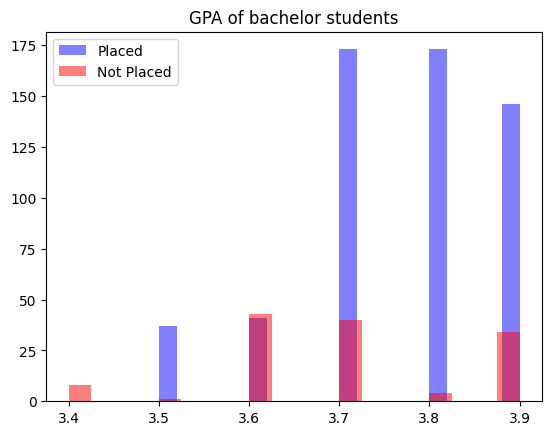

In [50]:
plt.hist(placed_df['gpa'], bins=20, alpha=0.5, label='Placed',color=['blue'])
plt.hist(not_placed_df['gpa'], bins=20, alpha=0.5, label='Not Placed',color=['red'])
plt.legend()
plt.title('GPA of bachelor students')
plt.show()

The two histograms are on the same scale. From a quick look, we can see that there are no very unusual points, or outliers. The data look roughly bell-shaped, so our initial idea of a normal distribution seems reasonable.

In [40]:
def calculate_t_statisctics(sample1,sample2):
    pooled_variance=((len(sample1)-1)*sample1.var()+(len(sample2)-1)*sample2.var())/(len(sample1)+len(sample2)-2)
    return np.abs(sample1.mean()-sample2.mean())/np.sqrt(pooled_variance*(1/len(sample1)+1/len(sample2)))
def calculate_degrees_of_freedom(sample):
    return len(sample)-1

In [41]:
def calculate_p_value_less_t(sample1, sample2):
    t_statistic = calculate_t_statisctics(sample1,sample2)
    degrees_of_freedom = calculate_degrees_of_freedom(sample1)
    return stats.t.cdf(t_statistic, degrees_of_freedom)

In [42]:
print(f"p_value is: {calculate_p_value_less_t(placed_df['gpa'],not_placed_df['gpa'])}")

p_value is: 0.99999977448368


In [43]:
stats.ttest_ind(placed_df['gpa'],not_placed_df['gpa'],equal_var=True,nan_policy='raise',alternative='less')

TtestResult(statistic=5.105318956468754, pvalue=0.9999997868177752, df=698.0)

We can see both p_values are close to 1 so we can not reject the null hypothesis as we expected.

## Questions

3. How does increasing the sample size affect your coin test?\
As we increase the sample size the range of confidence interval increases.\
About the p_value if the null hypothesis is that the coin is fair:\
if p = 60%:\
When sample size equals 30 we often can not reject the null hypothesis. If sample size is 100 we sometimes reject the null hypothesis though sometimes we cannot reject it. With sample size of 1000 we reject null hypothesis almost every time.\
if = 50%:\
we rarely reject the null hypothesis with neither sample size.

4. What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they
help us to compare two data sets?\
t-statistic for two data sets means how many standard errors away is the difference between means of the two data. The more the means of two samples differes the greater the t-statisitc becomes and the greater the t-statistic is the more the likely it is that the differences between two samples is not random.\
Degrees of freedom is the number of data points in the sample minus 1. It is the only parameter of the t-distribution and if it gets too great, the t-distribution converges to the normal distribution. The smaller the sample size is the more the difference of t-distribution and normal distribution becomes and the likely to use t-distribution instead of normal distribution. As degrees of freedom increases the t-statistic increases and it gets more likely that the differences of two samples is not random.\
t-distribution is a probability distribution with one parameter which is degree of freedom. Like normal distribution it has a bell shaped curve. However, unlike the normal distribution, the t-distribution has thicker tails, especially for smaller sample sizes so it may make more sense to use t-distribution for smaller sample size.The p_value can be computed from the area under the t-distribution curve.

5. What are the preliminary conditions for using t-test on our data?\
The first preliminary condition for using t-test is same as the first condition for using central limit theorem. It is that the observations should be independent of each other so sampling should be random and the sample size should be less thatn 10% of the population size. The second condition for clt was that the sample size should be great enough that both np and n(1-p) be less than 10 or we may say based on experience that the sample size should be at least 30 so that the distribution of sample would be symmetrical. However, the second condition for using t-test is the opposite of the second condition for using clt. It states that the sample size should be small. In this case both conditions are satisfied so we can use t-test.

6. Read about some other types of tests that are used in scientific research. Write a line
about each of them.\
One sample t-test: A one sample t-test allows us to test whether a sample mean (of a normally distributed interval variable) significantly differs from a hypothesized value.\
One sample median test: A one sample median test allows us to test whether a sample median differs significantly from a hypothesized value.\
Binomial test: A one sample binomial test allows us to test whether the proportion of successes on a two-level categorical dependent variable significantly differs from a hypothesized value.\
Two independent samples t-test(this is the test I used):An independent samples t-test is used when you want to compare the means of a normally distributed interval dependent variable for two independent groups.\
Wilcoxon-Mann-Whitney test: The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal).\
Chi-square test: A chi-square test is used when you want to see if there is a relationship between two categorical variables.\
Fisher’s exact test: The Fisher’s exact test is used when you want to conduct a chi-square test but one or more of your cells has an expected frequency of five or less.\
Kruskal Wallis test: The Kruskal Wallis test is used when you have one independent variable with two or more levels and an ordinal dependent variable.\
Paired t-test: A paired (samples) t-test is used when you have two related observations (i.e., two observations per subject) and you want to see if the means on these two normally distributed interval variables differ from one another.\
Wilcoxon signed rank sum test: The Wilcoxon signed rank sum test is the non-parametric version of a paired samples t-test.\
McNemar test: You would perform McNemar’s test if you were interested in the marginal frequencies of two binary outcomes.